# Prediction relevance of article of future year 


### Packages

In [725]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [726]:
import functions    # my own functions which are used in more notebooks
import pandas as pd
from sklearn.preprocessing import RobustScaler
import numpy as np
import seaborn as sns
import operator

## Upload cleaned abstracts

In [321]:
df_all = pd.read_csv("1.Preprocessing_outputs/df_sw_tok_low_punc_lemm_v6.csv").rename(columns = {'doi_x':'doi'}).set_index("doi")

# Articles

### 1) Table with AUC

In [322]:
list_years = [2017,2018,2019]

In [323]:
fin_list = []
for train_year in list_years:
    
    bow = pd.read_csv('3.Classifiers_outputs/train_'+str(train_year)+'/'+"res_all_bow_"+str(train_year)+".csv")
    bow.columns = bow.iloc[0]
    bow = bow.iloc[2:]
    auc_bow = bow.iloc[:, 0:4]
    auc_bow = auc_bow[auc_bow["dataset_of_predictions"].isin(["0.05","1.0"])]
    auc_bow["Train/Test years"] = str(train_year-1)+"+"+str(train_year)+"/"+str(train_year+1)
    auc_bow["model"] = "bow"
    
    w2v = pd.read_csv('3.Classifiers_outputs/train_'+str(train_year)+'/'+"res_all_w2v_avg_"+str(train_year)+".csv")
    w2v.columns = w2v.iloc[0]
    w2v = w2v.iloc[2:]
    auc_w2v = w2v.iloc[:, 0:4]
    auc_w2v = auc_w2v[auc_w2v["dataset_of_predictions"].isin(["0.05","1.0"])]
    auc_w2v["Train/Test years"] = str(train_year-1)+"+"+str(train_year)+"/"+str(train_year+1)
    auc_w2v["model"] = "w2v"
    
    fin = pd.concat([auc_bow,auc_w2v]).pivot(index=["Train/Test years","dataset_of_predictions"],columns = "model",
                                             values=["predictions splitted train set","predictions tested new month","predictions whole train set"])
    fin_list.append(fin)

In [324]:
pd.concat(fin_list)

predictions splitted train set  \
model                                                              bow   
Train/Test years dataset_of_predictions                                  
2016+2017/2018   0.05                               0.6918714555765595   
                 1.0                                0.6069714242856072   
2017+2018/2019   0.05                                0.857638888888889   
                 1.0                                0.6455343756693082   
2018+2019/2020   0.05                               0.8099489795918368   
                 1.0                                0.5697739395478791   

                                                             \
model                                                   w2v   
Train/Test years dataset_of_predictions                       
2016+2017/2018   0.05                    0.8128544423440454   
                 1.0                      0.602246306157654   
2017+2018/2019   0.05                    0.8072916666666666   
                 1.0                     0.6050189191118727   
2018+2019/2020   0.05                    0.6849489795918368   
                 1.0                     0.5897129794259588   

                                        predictions tested new month  \
model                                                            bow   
Train/Test years dataset_of_predictions                                
2016+2017/2018   0.05                                       0.690625   
                 1.0                              0.5800826296479178   
2017+2018/2019   0.05                             0.5786236063052672   
                 1.0                              0.5464818989122706   
2018+2019/2020   0.05                              0.547005769036511   
                 1.0                              0.5334089961606434   

                                                              \
model                                                    w2v   
Train/Test years dataset_of_predictions                        
2016+2017/2018   0.05                               0.825625   
                 1.0                      0.6025901456956955   
2017+2018/2019   0.05                     0.6820453671664743   
                 1.0                      0.5749307877339224   
2018+2019/2020   0.05                    0.49690129410488276   
                 1.0                      0.5119924862422618   

                                        predictions whole train set  \
model                                                           bow   
Train/Test years dataset_of_predictions                               
2016+2017/2018   0.05                            0.8419899189129958   
                 1.0                              0.768392687411524   
2017+2018/2019   0.05                            0.8493055555555555   
                 1.0                             0.7657500253577587   
2018+2019/2020   0.05                            0.8422111563804636   
                 1.0                              0.760317916842824   

                                                             
model                                                   w2v  
Train/Test years dataset_of_predictions                      
2016+2017/2018   0.05                    0.7286142157937029  
                 1.0                     0.6177710393709175  
2017+2018/2019   0.05                    0.6807638888888888  
                 1.0                     0.5895050308364632  
2018+2019/2020   0.05                    0.6942306725013832  
                 1.0                     0.6143040220820188

### 2) Correlation of predictions

           Score_BOW  Score_W2V
Score_BOW   1.000000   0.449547
Score_W2V   0.449547   1.000000
           Score_BOW  Score_W2V
Score_BOW   1.000000   0.402655
Score_W2V   0.402655   1.000000
           Score_BOW  Score_W2V
Score_BOW    1.00000    0.50504
Score_W2V    0.50504    1.00000


,Score_BOW,Score_W2V,Train/Test years
Score_BOW,1.000000,0.449547,2016+2017/2018
Score_W2V,0.449547,1.000000,2016+2017/2018
Score_BOW,1.000000,0.402655,2017+2018/2019
Score_W2V,0.402655,1.000000,2017+2018/2019
Score_BOW,1.000000,0.505040,2018+2019/2020
Score_W2V,0.505040,1.000000,2018+2019/2020


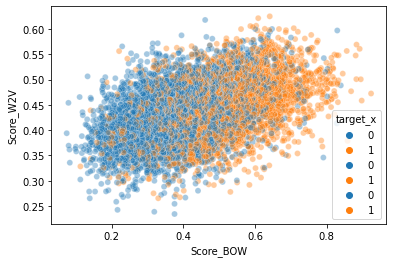

In [325]:
fin_list = []
for train_year in list_years:
    bow = pd.read_csv('3.Classifiers_outputs/train_'+str(train_year)+'/'+"score_art_lr_bow.csv")
    w2v = pd.read_csv('3.Classifiers_outputs/train_'+str(train_year)+'/'+"score_art_lr_w2v_avg.csv")
    res_join = bow.merge(w2v, on="doi", how="left").rename(columns={"score_x": "Score_BOW", "score_y": "Score_W2V"})
    print(res_join[["Score_BOW","Score_W2V"]].corr())
    #sns.lmplot('score_x', 'score_y', data=res_join, hue='target_x', fit_reg=False)
    #plt.show()
    cor_df = res_join[["Score_BOW","Score_W2V"]].corr()
    cor_df["Train/Test years"] = str(train_year-1)+"+"+str(train_year)+"/"+str(train_year+1)
    fin_list.append(cor_df)
    sns.scatterplot(x="Score_BOW", y="Score_W2V", data=res_join, hue = "target_x",alpha=0.4)
    #plt.show()
pd.concat(fin_list)

# Entities 

### 1)  correlation BOW vs W2V

In [330]:
for train_year in list_years:
    print(train_year)
    score_bow = pd.read_csv('3.Classifiers_outputs/train_'+str(train_year)+'/'+"FI_LR_BOW.csv")
    score_bow["word"] = score_bow["word"].astype(str)
    score_w2v = pd.read_csv('3.Classifiers_outputs/train_'+str(train_year)+'/'+"FI_LR_W2V.csv")
    score_w2v["word"] = score_w2v["word"].astype(str)
    join_df = score_w2v[["word","score"]].merge(score_bow[["score","word"]],on="word",how="inner")
    print(len(join_df))
    print(join_df.corr())

2017
9221
          score_x   score_y
score_x  1.000000  0.041421
score_y  0.041421  1.000000
2018
9400
          score_x   score_y
score_x  1.000000  0.022687
score_y  0.022687  1.000000
2019
10378
          score_x   score_y
score_x  1.000000  0.043281
score_y  0.043281  1.000000
